In [54]:
#package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
#Reading file
try:
  boston_df = pd.read_csv('LinearRegression.csv')
except FileNotFoundError:
  print("Error: Boston.csv not found")
  exit()

In [44]:
#print the dataset (few rows and info)
print("--------Dataset Head------------")
print(boston_df.head())
print("\n-----------Dataset Info---------")
print(boston_df.info())

--------Dataset Head------------
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

-----------Dataset Info---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CH

In [45]:
x = boston_df[['RM']]
y = boston_df['MEDV']

In [46]:
#to shape the data
print('Shape of Predictor (X):',x.shape)
print('Shape of Taget(Y)',y.shape)

Shape of Predictor (X): (506, 1)
Shape of Taget(Y) (506,)



Displaying Scatter plot...


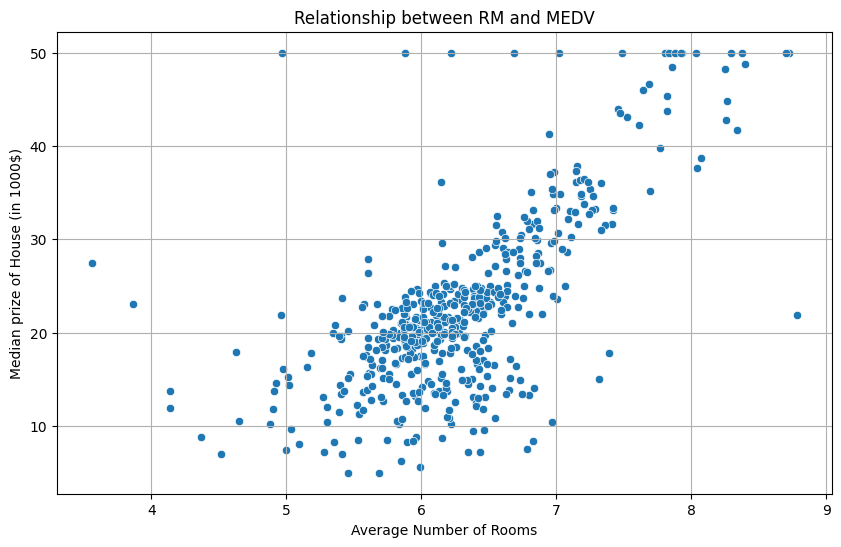

In [47]:
#plotting the data
plt.figure(figsize=(10,6))
sns.scatterplot(x='RM',y='MEDV',data=boston_df)
plt.title('Relationship between RM and MEDV')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median prize of House (in 1000$)')
plt.grid(True)
print("\nDisplaying Scatter plot...")
plt.show()

In [48]:
#splitting Data into Testing and Training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print("Data Splitting")
print(f"Training Set and Size {len(X_train)}")
print(f"Testing Set and Size {len(X_test)}")

Data Splitting
Training Set and Size 339
Testing Set and Size 167


In [49]:
#Creating the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Created")

Model Created


In [50]:
#Printing slope, Y intercept and model
coeff= model.coef_[0]
intercept = model.intercept_
print(f"Intercept: {intercept}")
print(f"Coefficient: {coeff}")
print(f"The Linear Regression model is Y={intercept:.4f}+{coeff:.4f}x")

Intercept: -34.22235234632533
Coefficient: 9.03907314270889
The Linear Regression model is Y=-34.2224+9.0391x


In [55]:
y_test_pred= model.predict(X_test)
y_train_pred= model.predict(X_train)

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("\n--Model Evaluation--")
print(f"Training Set Mean Squared Error: {mse_train:.4f}")
print(f"Testing Set Mean Squared Error: {mse_test:.4f}")


--Model Evaluation--
Training Set Mean Squared Error: 45.8290
Testing Set Mean Squared Error: 39.0911


In [56]:
re_train = r2_score(y_train,y_train_pred)
re_test = r2_score(y_test, y_test_pred)

print(f"Training Set R-squared: {re_train:.4f}")
print(f"Testing Set R-squared: {re_test:.4f}")

Training Set R-squared: 0.4801
Testing Set R-squared: 0.4835


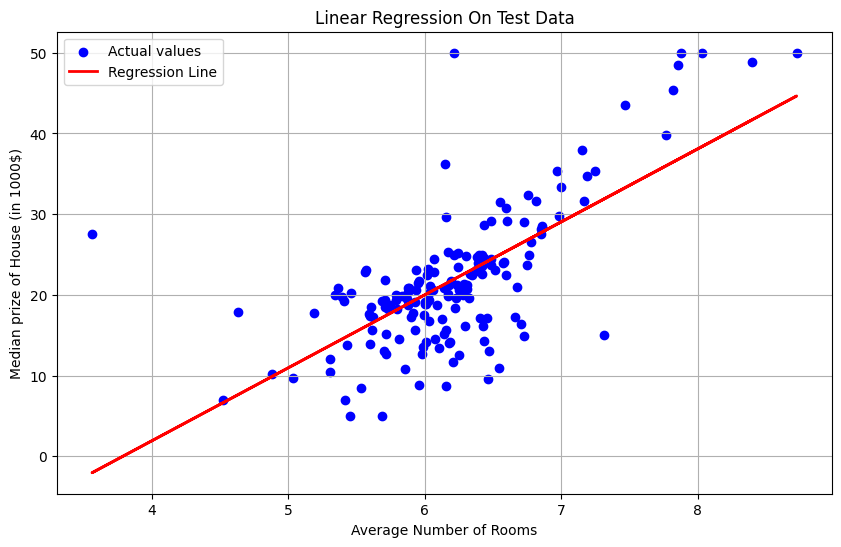

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue',label="Actual values")
plt.plot(X_test, y_test_pred, color='red',linewidth=2,label='Regression Line')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median prize of House (in 1000$)')
plt.title('Linear Regression On Test Data')
plt.legend()
plt.grid(True)
plt.show()
